# Problem Statement :
Using Deep Learning techniques, predict the coordinates (x,y) of a pixel which has a value of 255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0. The pixel with a value of 255 is randomly assigned. You may generate a dataset as required for solving the problem. Please explain your rationale behind dataset choices.

Generate Dataset

In [1]:
import os
import numpy as np
from PIL import Image

class DataGenerator:
    def __init__(self, image_size=50, num_images=10000, output_dir="dataset"):
        self.image_size = image_size
        self.num_images = num_images
        self.output_dir = output_dir

    def generate_dataset(self):
        images = []
        labels = []
        for _ in range(self.num_images):
            image = np.zeros((self.image_size, self.image_size), dtype=np.uint8)
            x, y = np.random.randint(0, self.image_size, size=2)
            image[x, y] = 255
            images.append(image)
            labels.append([x, y])
        images = np.array(images).reshape(-1, self.image_size, self.image_size, 1)
        labels = np.array(labels)
        return images, labels

    def save_images(self, images, labels, category):
        os.makedirs(f"{self.output_dir}/{category}/images", exist_ok=True)
        os.makedirs(f"{self.output_dir}/{category}/labels", exist_ok=True)

        for i, (image, label) in enumerate(zip(images, labels)):
            img = Image.fromarray(image.reshape(self.image_size, self.image_size))
            img.save(f"{self.output_dir}/{category}/images/{i}.png")
            with open(f"{self.output_dir}/{category}/labels/{i}.txt", "w") as f:
                f.write(f"{label[0]} {label[1]}")


Data Preprocessor

In [2]:
from sklearn.model_selection import train_test_split

class DataPreprocessor:
    def __init__(self, test_size=0.2, random_state=42, output_dir="dataset"):
        self.test_size = test_size
        self.random_state = random_state
        self.output_dir = output_dir

    def split_data(self, images, labels):
        X_train, X_val, y_train, y_val = train_test_split(
            images, labels, test_size=self.test_size, random_state=self.random_state)
        return X_train, X_val, y_train, y_val

    def save_split_data(self, X_train, X_val, y_train, y_val):
        data_generator = DataGenerator(output_dir=self.output_dir)
        data_generator.save_images(X_train, y_train, "train")
        data_generator.save_images(X_val, y_val, "test")


Model Building

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

class PixelPredictorModel:
    def __init__(self, input_shape=(50, 50, 1)):
        self.input_shape = input_shape
        self.model = self.build_model()

    def build_model(self):
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=self.input_shape),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(2)  # Output layer for (x, y) coordinates
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
        return history

    def predict(self, X):
        return self.model.predict(X)

    def save_model(self, file_path):
        self.model.save(file_path)

    def load_model(self, file_path):
        self.model = tf.keras.models.load_model(file_path)


Train Model

Evaluate Model

In [4]:
import matplotlib.pyplot as plt

class ModelEvaluator:
    @staticmethod
    def plot_loss(history):
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.legend()
        plt.show()

    @staticmethod
    def plot_predictions(X_val, y_val, predictions, num_examples=5):
        for i in range(num_examples):
            plt.imshow(X_val[i].reshape(50, 50), cmap='gray')
            plt.scatter(predictions[i][1], predictions[i][0], color='r', label='Predicted')
            plt.scatter(y_val[i][1], y_val[i][0], color='g', label='True')
            plt.legend()
            plt.show()

    @staticmethod
    def display_predictions(predictions, y_val, num_examples=5):
        for i in range(num_examples):
            true_coords = y_val[i]
            pred_coords = predictions[i]
            print(f'Example {i+1}:')
            print(f'True Coordinates: (x={true_coords[0]}, y={true_coords[1]})')
            print(f'Predicted Coordinates: (x={int(pred_coords[0])}, y={int(pred_coords[1])})')
            print('---')

Pipeline Creation


Epoch 1/50
250/250 [==============================] - 41s 160ms/step - loss: 46.2123 - val_loss: 11.2712
Epoch 2/50
250/250 [==============================] - 41s 163ms/step - loss: 16.5421 - val_loss: 4.4827
Epoch 3/50
250/250 [==============================] - 38s 152ms/step - loss: 13.6639 - val_loss: 3.3688
Epoch 4/50
250/250 [==============================] - 41s 163ms/step - loss: 12.0131 - val_loss: 1.7054
Epoch 5/50
250/250 [==============================] - 41s 165ms/step - loss: 11.6034 - val_loss: 3.0207
Epoch 6/50
250/250 [==============================] - 41s 163ms/step - loss: 11.5968 - val_loss: 2.8811
Epoch 7/50
250/250 [==============================] - 40s 159ms/step - loss: 11.0785 - val_loss: 4.7158
Epoch 8/50
250/250 [==============================] - 38s 151ms/step - loss: 10.1671 - val_loss: 1.1575
Epoch 9/50
250/250 [==============================] - 39s 155ms/step - loss: 10.5578 - val_loss: 1.9664
Epoch 10/50
250/250 [==============================] - 40s 160m

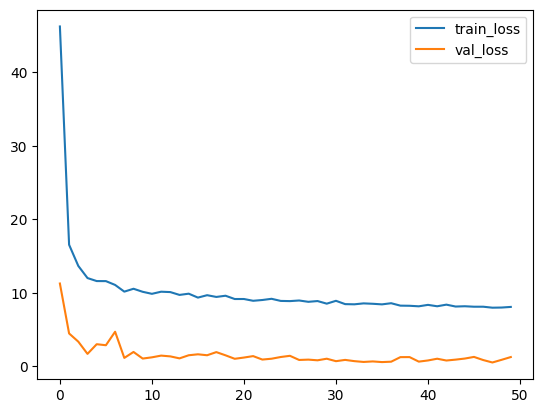

63/63 [==============================] - 2s 34ms/step


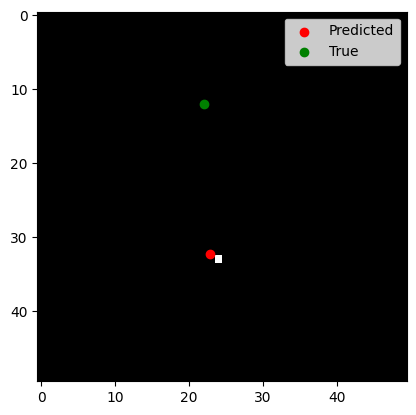

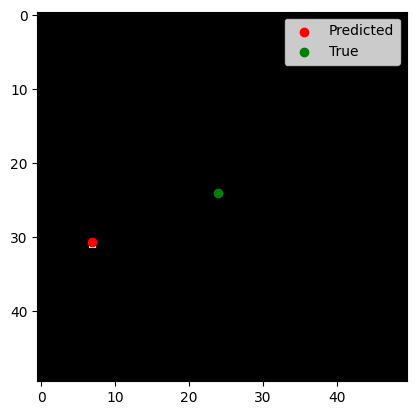

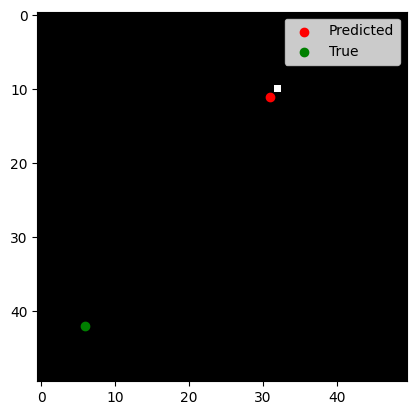

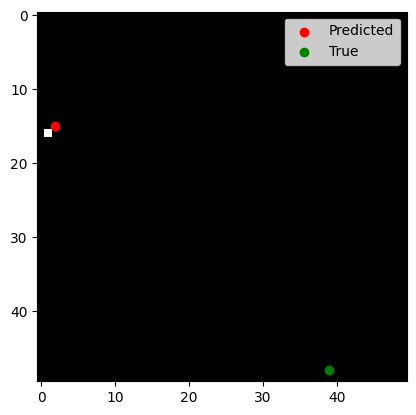

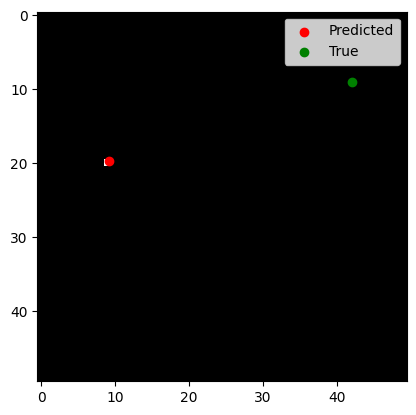

Example 1:
True Coordinates: (x=33, y=24)
Predicted Coordinates: (x=32, y=22)
---
Example 2:
True Coordinates: (x=31, y=7)
Predicted Coordinates: (x=30, y=6)
---
Example 3:
True Coordinates: (x=10, y=32)
Predicted Coordinates: (x=11, y=30)
---
Example 4:
True Coordinates: (x=16, y=1)
Predicted Coordinates: (x=14, y=1)
---
Example 5:
True Coordinates: (x=20, y=9)
Predicted Coordinates: (x=19, y=9)
---


In [5]:
class PixelPredictionPipeline:
    def __init__(self, num_images=10000, image_size=50, test_size=0.2, random_state=42, epochs=50, batch_size=32, output_dir="dataset"):
        self.num_images = num_images
        self.image_size = image_size
        self.test_size = test_size
        self.random_state = random_state
        self.epochs = epochs
        self.batch_size = batch_size
        self.output_dir = output_dir

        self.data_generator = DataGenerator(image_size=image_size, num_images=num_images, output_dir=output_dir)
        self.data_preprocessor = DataPreprocessor(test_size=test_size, random_state=random_state, output_dir=output_dir)
        self.model = PixelPredictorModel(input_shape=(image_size, image_size, 1))
        self.evaluator = ModelEvaluator()

    def run(self):
        # Step 1: Generate dataset
        images, labels = self.data_generator.generate_dataset()

        # Step 2: Split dataset
        X_train, X_val, y_train, y_val = self.data_preprocessor.split_data(images, labels)

        # Step 3: Save split data
        self.data_preprocessor.save_split_data(X_train, X_val, y_train, y_val)

        # Step 4: Train model
        history = self.model.train(X_train, y_train, X_val, y_val, epochs=self.epochs, batch_size=self.batch_size)

        # Step 5: Evaluate model
        self.evaluator.plot_loss(history)

        # Step 6: Make predictions
        predictions = self.model.predict(X_val)

        # Step 7: Visualize predictions
        self.evaluator.plot_predictions(X_val, y_train, predictions)

        # Step 8: Display predictions
        self.evaluator.display_predictions(predictions, y_val)

# Run the pipeline
pipeline = PixelPredictionPipeline()
pipeline.run()


In [6]:
import shutil

# Compress the directory into a ZIP file
shutil.make_archive('/content/dataset', 'zip', '/content/dataset')


'/content/dataset.zip'

In [7]:
from google.colab import files

# Download the ZIP file
files.download('/content/dataset.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>